In [13]:
from scipy.spatial import distance_matrix
import pandas as pd

In [14]:
dataset=pd.read_csv('../python-ml-course/datasets/movies/movies.csv',sep=";")
dataset.head()

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6


In [15]:
movies=dataset.columns.values.tolist()[1:] #omitimos user_id
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [16]:
arr=distance_matrix(dataset[movies],dataset[movies],p=2) #p=1 distancia de manhatan p=2 distancia euclidia
matriz=pd.DataFrame(arr,columns=dataset['user_id'],index=dataset['user_id'])
matriz

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

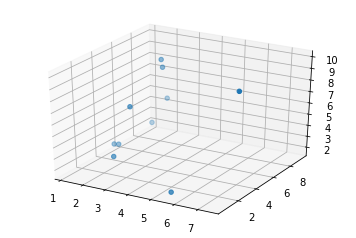

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xs=dataset['star_wars'],ys=dataset['lord_of_the_rings'],zs=dataset['harry_potter'])

## Clustering Jerarquico Asociativo

In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage

In [20]:
clusterings=linkage(dataset[movies],'ward')
clusterings #array([[ id_usuario , id_usuario , distancia , #elementos_en_cluster ]])

#Los clusters generados tienen como id_usuario=len(dataset[movies])++ 

#en este caso el primer cluster tiene como id_usuario=11, el segundo cluster id_usuario=12

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

<function matplotlib.pyplot.show(*args, **kw)>

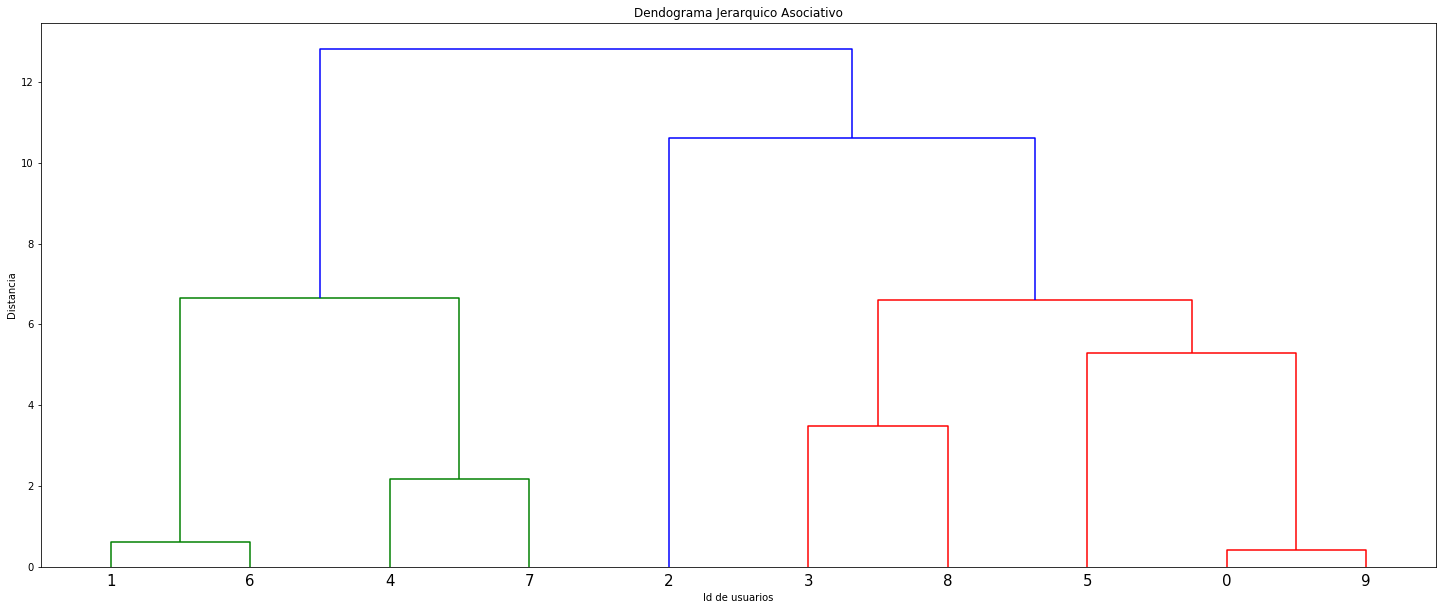

In [29]:
plt.figure(figsize=(25,10)) #tamaño del endograma
plt.title('Dendograma Jerarquico Asociativo')
plt.xlabel('Id de usuarios')
plt.ylabel('Distancia')
dendrogram(clusterings,leaf_font_size=15)
plt.show